In [1]:
from spatial_statistics_tools3D import *
from process_images3D import *
from two_sample_testing import *
from utilities import *

In [4]:
temp_folder = "/Volumes/Seagate Exp/hci_project/temp/cell_mask3D"
os.listdir(temp_folder)

['.DS_Store',
 'check_plots',
 'U373-SA-HB-SCC-8B5_Snap-JF503_Halo-SiR-01_czi_#01_channel1_cell_mask3D.npy',
 'U373-SA-HB-SCC-8B5_Snap-JF503_Halo-SiR-01_czi_#02_channel1_cell_mask3D.npy',
 'U373-SA-HB-SCC-8B5_Snap-JF503_Halo-SiR-01_czi_#03_channel1_cell_mask3D.npy',
 'U373-SA-HB-SCC-8B5_Snap-JF503_Halo-SiR-01_czi_#04_channel1_cell_mask3D.npy',
 'U373-SA-HB-SCC-8B5_Snap-JF503_Halo-SiR-01_czi_#05_channel1_cell_mask3D.npy',
 'U373-SA-HB-SCC-8B5_Snap-JF503_Halo-SiR-01_czi_#06_channel1_cell_mask3D.npy']

In [8]:
filepath = os.path.join(temp_folder, "U373-SA-HB-SCC-8B5_Snap-JF503_Halo-SiR-01_czi_#05_channel1_cell_mask3D.npy")
img = np.load(filepath)

In [12]:
img2 = cut_away_zeros3D(img)

In [16]:
sum_img = np.sum(img, axis=0)

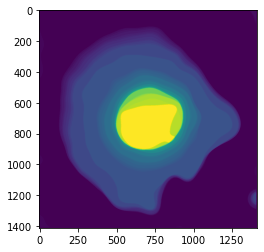

In [18]:
plt.imshow(sum_img)

In [12]:
mem[2]

43.7

In [55]:
filepath1 = "nonsense1"

filepath2 = "nonsense2"


f = open("finished_files.txt", 'a')
f.write(filepath1)
f.write("\n")
f.close()

In [24]:
with open("finished_files.txt", 'r') as f:
    text = f.read()

In [26]:
finished_files = text.split("\n")


nonsense2
nonsense1



In [27]:
a = []

In [28]:
a[-1]

IndexError: list index out of range

In [4]:
test = np.ones((3,11,7))
test2 = test.astype(np.float64)

In [8]:
test2

array([[[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        

In [48]:
def distance_array1D(dim1, dim2):
    """
    Returns 2-dimensional array where the pixel intensities are equal to the distance from the center
    of the array in one dimension, given by dim1.
    """
    half_dim_1 = int((dim1-1)/2)
    dim_1_range = list(range(1,half_dim_1+1))
    line = dim_1_range[::-1] + [0] + dim_1_range 

    # array where every element is x distance from center
    dist_1_2D = np.array([line, ]*dim2)

    return dist_1_2D


def distance_arr3D(arr, len_x=1, len_y=1, len_z=1, img_name="unnamed", temp_folder="temp", save=False):
    """
    Computes array whose elements are equal to their Euclidean distance from the center.
    """
    # if the distance array was already computed previously, it can be loaded from existing .npy file
    # located in temp folder
    dist_array_folder = create_folder("cutting_ellipsoid3D", temp_folder, False)
    file_path = os.path.join(dist_array_folder, "distance_array3D.npy")
    if os.path.isfile(file_path):
        print("Distance array already computed, loading .npy file...")
        dist_3D = np.load(file_path)
        return dist_3D
    elif save:
        print("No .npy file for distance array found, computing and saving distance array...")
    
    dimz, dimy, dimx = arr.shape

    # array should have equal dimensions, dimension should be odd
    if is_even(dimx) or is_even(dimy) or is_even(dimz):
        print("Error! There should be an odd pixel number in all dimensions!")
        return
        
    # array where every element is x-distance from center
    dist_x_2D = distance_array1D(dimx, dimy)
    dist_x = np.tile(dist_x_2D, (dimz, 1, 1))
    # array where every element is y-distance from center
    dist_y_2D = distance_array1D(dimy, dimx).T
    dist_y = np.tile(dist_y_2D, (dimz, 1, 1))
    
    half_dim_z = int(dimz/2) 
    z_range = list(range(1,half_dim_z+1))
    line_z = z_range[::-1] + [0] + z_range 
    
    # array where every element is z distance from center
    z_arrays = [np.zeros((dimy,dimx))+z_dist for z_dist in line_z]    
    dist_z = np.stack(z_arrays, axis=0)
    
    # compute array whose elements are equal to their Euclidean distance from the center
    dist_3D = np.sqrt((dist_x*len_x)**2 + (dist_y*len_y)**2 + (dist_z*len_z)**2)

    if not (dist_3D.shape == (dimz, dimy, dimx)):
        print("Error! 3D distance array has wrong shape!")
        return
    
    # save array to be reused in other computations
    if save:
        np.save(file_path, dist_3D)
    
    return dist_3D

In [57]:
test.shape
dist.shape

(3, 11, 7)

In [62]:
dist = distance_arr3D(test, len_x = 0.4, len_y = 0.8, len_z = 0.4)

In [63]:
print(np.round(dist,2))

[[[10.08  8.39  7.18  6.73  7.18  8.39 10.08]
  [ 9.35  7.5   6.12  5.59  6.12  7.5   9.35]
  [ 8.75  6.73  5.15  4.51  5.15  6.73  8.75]
  [ 8.29  6.12  4.33  3.54  4.33  6.12  8.29]
  [ 8.    5.73  3.75  2.8   3.75  5.73  8.  ]
  [ 7.91  5.59  3.54  2.5   3.54  5.59  7.91]
  [ 8.    5.73  3.75  2.8   3.75  5.73  8.  ]
  [ 8.29  6.12  4.33  3.54  4.33  6.12  8.29]
  [ 8.75  6.73  5.15  4.51  5.15  6.73  8.75]
  [ 9.35  7.5   6.12  5.59  6.12  7.5   9.35]
  [10.08  8.39  7.18  6.73  7.18  8.39 10.08]]

 [[ 9.76  8.    6.73  6.25  6.73  8.    9.76]
  [ 9.01  7.07  5.59  5.    5.59  7.07  9.01]
  [ 8.39  6.25  4.51  3.75  4.51  6.25  8.39]
  [ 7.91  5.59  3.54  2.5   3.54  5.59  7.91]
  [ 7.6   5.15  2.8   1.25  2.8   5.15  7.6 ]
  [ 7.5   5.    2.5   0.    2.5   5.    7.5 ]
  [ 7.6   5.15  2.8   1.25  2.8   5.15  7.6 ]
  [ 7.91  5.59  3.54  2.5   3.54  5.59  7.91]
  [ 8.39  6.25  4.51  3.75  4.51  6.25  8.39]
  [ 9.01  7.07  5.59  5.    5.59  7.07  9.01]
  [ 9.76  8.    6.73  6.25  6.73

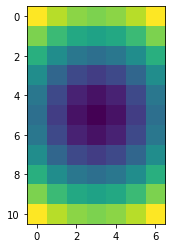

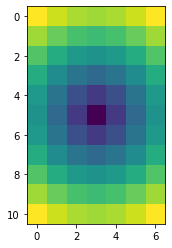

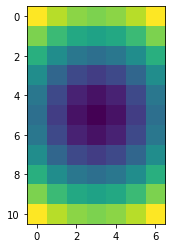

In [54]:
for i in range(3):
    plt.imshow(dist[i])
    plt.show()

In [18]:
import numpy as np
from time import time
from utilities import *

In [14]:
test = np.random.rand(95, 2100, 2200)

In [20]:
# save
t0 = time()
np.savez_compressed("test.npz", test)
t1 = time()
print(f"done in {t1-t0:.2f}")


# load
t0 = time()
np.load("test.npz")
t1 = time()
print(f"done in {t1-t0:.2f}")

done in 134.81
done in 0.01


In [20]:
print("test1", end="\r")
print("test2")

test2


In [23]:
import time

range_of_t=np.arange(1, 100, 10)

count=0
for t in range_of_t:
    time.sleep(1)
    count+=1
    prog = count/len(range_of_t)*100
    if prog<100:
        print(f"Progress: {prog:.2f}%, t={t}", end="\r")
    else:
        print(f"Progress: {prog:.2f}%, t={t}")
print("Done!")

Progress: 100.00%, t=91
Done!
